In [18]:
%matplotlib inline
import os
import re
import copy
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from lxml import etree
import json
import time
import numpy as np

In [19]:
#  truth format is fos \t author author author.....
#  result format is author \t author \t author  .....

In [26]:
# some constant
conference = 'AAAI'
resdir = os.path.join('res', 'cite', conference)
pos_tag = 'cmty'
truth_dir = os.path.join('data', 'cite', conference)

In [37]:
def load_r_comm(step):
    comm = []
    filename = os.path.join(resdir, '%s.%s.txt' % (step, pos_tag))
    f = open(filename, 'r')
    for i, line in enumerate(f):
        comm.append(set())
        tpls = line.split('\t')[:-1]
        for tpl in tpls:
            au = tpl.split(',')[0]
            comm[i].add(au)
    return comm

In [38]:
res_comm = load_r_comm('final')

(array([  3.,   0.,   2.,   3.,  11.,  10.,  26.,  22.,  15.,   8.]),
 array([   45. ,   246.4,   447.8,   649.2,   850.6,  1052. ,  1253.4,
         1454.8,  1656.2,  1857.6,  2059. ]),
 <a list of 10 Patch objects>)

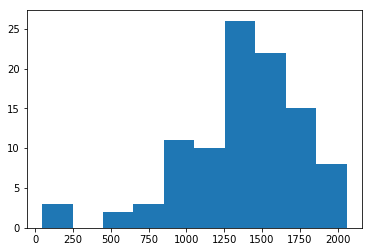

In [23]:
plt.hist(np.array([len(i) for i in res_comm]), bins=10)

In [39]:
def load_t_comm(scope):
    comm = []
    fos_name = []
    filename = os.path.join(truth_dir, 'c_fos_L%d.txt' % scope)
    f = open(filename, 'r')
    for i, line in enumerate(f):
        line = line.strip('\n')
        comm.append(set())
        fos_name = line.split('\t')[0]
        aus = line.split('\t')[1]
        for au in aus.split(' '):
            comm[i].add(au)
    return comm, fos_name
        

In [40]:
truth_comm_scopes = []
truth_comm_scopes_name = []
for i in range(4):
    comm, fos_name = load_t_comm(i)
    truth_comm_scopes.append(comm)
    truth_comm_scopes_name.append(fos_name)

In [41]:
def precision(r, t):
    # r, t a set of authors
    # r-predict t -ruth
    # r & t TP
    # r - r & t FP
    # t - r & t TN
    # precision = tp/(tp+fp)
    return len(r&t)/(len(r))

In [42]:
def recall(r, t):
    return len(r&t)/(len(t))

In [43]:
def f1(r, t):
    pre = precision(r, t)
    rec = recall(r, t)
    if pre+rec < 1e-8:
        return 0
    return 2*(pre*rec)/(pre+rec)

In [44]:
def find_bestmatch_f1(xset, ycomm):
    best_score = -1
    for yset in ycomm:
        score = f1(xset, yset)
        if score > best_score:
            best_score = score
    return best_score

In [45]:
def measure(rcomm, tcomm):
    sum1 = 0
    sum2 = 0
    for rset in rcomm:
        sum1 += find_bestmatch_f1(rset, tcomm)
    for tset in tcomm:
        sum2 += find_bestmatch_f1(tset, rcomm)
    return 0.5*(sum1/len(rcomm) + sum2/len(tcomm))

In [ ]:
measure_res = []
for i in range(4):
    measure_res.append(measure(res_comm, truth_comm_scopes[i]))

In [36]:
print (measure_res)

[0.0, 0.0, 0.0, 0.0]
